Toolbox Notes

In [1]:
#using zip(); zip() function accepts arbitrary number of iterables and returns an iterator of tuples
avengers = ['hawkeye', 'iron man', 'thor', 'quicksilver']
names = ['barton', 'stark', 'odinson', 'maximoff']
z = zip(avengers, names) #creates a zip object which is an iterator of tuples
print(type(z))

<class 'zip'>


In [2]:
#using zip() cont'd
print(list(z))

[('hawkeye', 'barton'), ('iron man', 'stark'), ('thor', 'odinson'), ('quicksilver', 'maximoff')]


In [3]:
#defining a function
def raise_both(value1, value2):  #function header
    """Raise value1 to the power of value2 and vice versa."""  #doc strings
    
    new_value1 = value1 ** value2  #function body
    new_value2 = value2 ** value1
    
    new_tuple = (new_value1, new_value2)
    
    return new_tuple

In [4]:
#defining a function example
raise_both(3,4)

(81, 64)

List Comprehension

Basic
[output expression for iterator variable in iterable]

Advanced
[output expression + conditional on output for iterator variable in iterable + conditional on iterable]

In [5]:
#build a generator function
def num_sequence(n): #generator function that when called with the number n produces a generator object that generates 
    #integers 0 through n
    """Generate values from 0 to n."""
    i = 0 #i is initalized to 0 and first time function is called it yields i = 0
    while i < n:
        yield i
        i += 1 #then adds 1 to i and will yield 1 on the next iteration and so on
#the while loop is true until i = n and then the generator ceases to yield values

Reading a text file

    filename = 'huck_finn.txt'  #assign the filename to a variable as a string

    file = open(filename, mode = 'r')  #pass filename to function open and also pass argument mode = r which makes sure can only read it, not write to it, if wanted to write then mode = w

    text = file.read() #assign the text from the file to a variable text by applying method read to the connection to the file

    file.close()  #then close connection to file

    print(text)  #to read


Or best practice is to use WITH -- then don't have to worry about closing

    with open('huck_finn.txt', 'r') as file:

        print(file.read())

Importing Flat Files Using NumPy

    import numpy as np
    filename = 'MNIST.txt'
    data = np.loadtxt(filename, delimiter=',', dtype=str)  #delimiter can be whitespace too or tab-delimited '\t' so needs to be specified, dtype is to load it all in as strings (but probably wouldn't want to use for mixed data types)
    
Often will need to import datasets with different datatypes in different columns, so can use np.genfromtxt() instead and pass dtype=None to figure out what data types each column should be, and names=True means there's a header
    
    data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None)

Importing Using Pandas -- best practice!

    import pandas as pd
    filename = 'winequality-red.csv'
    data = pd.read_csv(filename)
    data.head()
    data_array = data.values #if want to convert into numpy array

Pickled Files

    import pickle
    with open('pickled_fruit.pkl', 'rb') as file: #read only & binary file
        data = pickle.load(file)
    print(data)
    ['peaches': 13, 'apples': 4, 'oranges': 11}

Importing Excel Spreadsheets

    import pandas as pd
    file = 'urbanpop.xlsx'
    data = pd.ExcelFile(file)
    print(data.sheet_names)
    ['1960-1966', '1967-1974', '1975-2011']
    df1 = data.parse('1960-1966') #sheet name, as string
    df2 = data.parse(0) #sheet index, as float
    df3 = data.parse(___, skiprows=___, names=___, parse_cols=___) #skips rows, names columns, designates which columns to parse

Exploring Current Working Directory

    import os          #this imports library os
    wd = os.getcwd()   #this stores the name of current directory in string called wd
    os.listdir(wd)     #outputs the contents of the directory in a list

SAS and Stata Files

    SAS: Statistical Analysis Systems    #used in business analytics & biostatistics
    Stata: "Statistics" + "data"         #academic social sciences research


Importing SAS Files

    import pandas as pd
    from sas7bdat import SAS7BDAT
    with SAS7BDAT('urbanpop.sas7bdat') as file:
        df_sas = file.to_data_frame()


Importing Stata Files

    import pandas as pd
    data = pd.read_stata('urbanpop.dta')


HDF5 Files

    Heirarchical Data Format version 5
    Standard for storing large quantities of numeric data
    Datasets can be hundreds of gigabytes or terabytes
    HDF5 can scale to exabytes

Importing HDF5 Files

    import h5py
    filename = 'H-H1_LOSC_4_V1-815411200-4096.hdf5'
    data = h5py.File(filename, 'r')        # 'r' is to read
    print(type(data))
    <class 'h5py._hl.files.File'>
    
    for key in data.keys():
        print(key)                         # there are three keys, each is an HDF group
    meta                                   # meta-data for file, basic info such as GPS times covered
    quality                                # refers to data quality
    strain                                 # strain data, main measurements
    
    print(type(data['meta']))
    <class 'h5py._hl.group.Group'>
    
    for key in data['meta'].keys():
        print(key)
    Description
    DescriptionURL
    Detector
    ...
    
    print(data['meta']['Description'].value, data['meta']['Detector'].value)

MATLAB

    "Matrix Laboratory"
    Industry standard in engineering and science
    Powerful linear algebra and matrix capabilities
    Data saved as .mat files (use scipy)

Importing a .mat file

    import scipy.io
    filename = 'workspace.mat'
    mat = scipy.io.loadmat(filename)
    print(type(mat))
    <class 'dict'>
                    # get a dictionary where
                    # keys = MATLAB variable names
                    # values = objects assigned to variables
    print(type(mat['x']))
    <class 'numpy.ndarray'>

Introduction to Relational Databases

    Tables are linked, ex. orders table with links to employees table and customers table
    Call this the "relational model" -- widely adopted
    Todd's 12 Rules/Commandments (actually consists of 13 rules since zero-indexed!)
        Describes what a Relational Database Management System should adhere to to be considered relational
        Examples: PostgreSQL, MySQL, SQLite ... all use SQL
        SQL = Structured Query Language ... which describes how you communicate with a database in order to both 
            access and update the information it contains

Creating a Database Engine - Example

    from sqlalchemy import create_engine                     # use SQLAlchemy package to access SQL database
    engine = create_engine('sqlite:///Northwind.sqlite')     # use SQLite database, which is fast and simple
    table_names = engine.table_names()                       # to get table names
    print(table_names)
    ['Categories', 'Customers', 'EmployeeTerritories', 'Employees']
                                Note: 'sqlite:///Northwind.sqlite' is called the connection string to the SQLite 
                                Database called Northwind.sqlite

Querying Relational Databases in Python

    Basic SQL query
    
    SELECT * FROM Table_Name                                 # this returns all columns of all rows of the table
    
    Workflow of SQL querying
        - import packages & functions
        - create the database engine
        - connect to the engine
        - query the database
        - save query results to a DataFrame
        - close the connection

    from sqlalchemy import create_engine
    import pandas as pd
    engine = create_engine('sqlite:///Northwind.sqlite')     # create the engine
    con = engine.connect()                                   # create the connection object con
    rs = con.execute("SELECT * FROM Orders")                 # to query the database
    df = pd.DataFrame(rs.fetchall())                         # turns it into a DataFrame, fetchall fetches all rows
    df.columns = rs.keys()                                   # this sets the DataFrame column names
    con.close()                                              # close the connection, don't forget!
    
    Can also use the context manager so don't have to worry about closing a connection
        from sqlalchemy import create_engine
        import pandas as pd
        engine = create_engine('sqlite:///Northwind.sqlite')
        with engine.connect() as con:
            rs = con.execute("SELECT OrderID, OrderDate, ShipName FROM Orders")  # no *(means select all columns)
            df = pd.DataFrame(rs.fetchmany(size = 5))        # instead of fetchall, imports 5 rows
            df.columns = rs.keys()
    
    Can also do this with one line of code:
        df = pd.read_sql_query("SELECT * FROM Orders", engine)
    
    Using INNER JOIN in Python(pandas)
        from sqlalchemy import create_engine
        import pandas as pd
        engine = create_engine('sqlite:///Northwind.sqlite')
        df = pd.read_sql_query("SELECT OrderID, CompanyName FROM Orders INNER JOIN Customers on Orders.CustomerID = 
        Customers.CustomerID", engine)
        print(df.head())
    

### DATA SCIENCE TOOLBOX - FUNCTIONS

In [6]:
# defining a function
def testsquare():                    # the function header
    new_value = 4 ** 2               # the function body (indented)
    print(new_value)
testsquare()

16


In [7]:
# function parameters
def newtestsquare(value):
    new_value = value ** 2
    print(new_value)
newtestsquare(3)
newtestsquare(4)
newtestsquare(5)

9
16
25


In [8]:
# return a value from a function using return
def othertestsquare(value):
    """Return the square of a value."""    # the docstring; describes what function does, serves as documentation
    new_value = value ** 2
    return new_value
num = othertestsquare(4)
print(num)

16


In [9]:
# define shout with the parameter, word
def shout(word):
    """Print a string with three exclamation marks"""
    # concatenate the strings: shout_word
    shout_word = word + '!!!'
    # print shout_word
    print(shout_word)
# call shout with the string 'congratulations
shout('congratulations')

congratulations!!!


In [11]:
# define shout with the parameter, word
def shout(word):
    """Return a string with three exclamation marks"""
    # concatenate the strings: shout_word
    shout_word = word + '!!!'
    # replace print with return
    return(shout_word)
# pass 'congratulations' to shout: yell
yell = shout('congratulations')

# print yell
print(yell)

congratulations!!!


In [12]:
# multiple function parameters
def raise_to_power(value1, value2):
    """Raise value1 to the power of value2."""
    new_value = value1 ** value2
    return new_value
# then call the function with 2 arguments bc there are 2 parameters
result = raise_to_power(2,3)
print(result)

8


In [13]:
# make functions return multiple values: tuples!
# tuples: like a list(can contain multiple values, immutable -- can't modify values!)
even_nums = (2, 4, 6) # tuples always have parentheses
print(type(even_nums))

<class 'tuple'>


In [14]:
# unpacking tuples! ... into several variables
even_nums = (2, 4, 6)
a, b, c = even_nums
print(a)
print(b)
print(c)

2
4
6


In [15]:
# can also access tuple elements like with a list
even_nums = (2, 4, 6)
print(even_nums[1])
third_num = even_nums[2]
print(third_num)

4
6


In [16]:
# let's now return multiple values
def raise_both_nums(value1, value2):
    """Raise value1 to the power of value2 and vice versa."""
    
    new_value1 = value1 ** value2
    new_value2 = value2 ** value1
    
    new_tuple = (new_value1, new_value2)
    
    return new_tuple

result = raise_both_nums(2,3)
print(result)

(8, 9)


In [17]:
# define shout_all with parameters word1 and word2
def shout_all(word1, word2):
    
    # concatenate word1 with '!!!': shout1
    shout1 = word1 + '!!!'
    
    # concatenate word2 with '!!!': shout2
    shout2 = word2 + '!!!'
    
    # construct a tuple with shout1 and shout2: shout_words
    shout_words = shout1, shout2
    
    # return shout_words
    return shout_words

# pass 'congratulations' and 'you' to shout_all(): yell1, yell2
yell1, yell2 = shout_all('congratulations', 'you')

# print yell1 and yell2
print(yell1)
print(yell2)
    

congratulations!!!
you!!!


In [18]:
# crash course on scope in functions
# scope - part of the program where an object or name may be accessible

new_val = 10                # global scope - defined in the main body of a script

def cubed(value):
    """Returns the cube of a number."""
    new_val = value ** 3    # local scope - defined inside a function
    return new_val

cubed(3)
 
# first look into local scope, then global, then built-in(like print)
# built-in scope - names in the pre-defined built-ins module

27

In [19]:
new_val

10

In [20]:
# nested functions

def mod2plus5(x1, x2, x3):
    """Returns the remainder plus 5 of three values."""
    
    def inner(x):
        """Returns the remainder plus 5 of a value."""
        return x % 2 + 5
    
    return (inner(x1), inner(x2), inner(x3))

print(mod2plus5(1, 2, 3))

(6, 5, 6)


## Introduction to Web Scraping

Learn how to
    - import and locally save datasets from the web
    - load datasets into pandas DataFrames
    - make HTTP requests (GET requests)
    - scrape web data such as HTML
    - parse HTML into useful data (BeautifulSoup)
    - use the urllib and requests packages

The urllib package
    - provides interface for fetching data across the web
    - urlopen() -- accepts URLs instead of file names

How to automate file download

    from urllib.request import urlretrieve   # import function urlretrieve from request subpackage of urllib package
    url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'   
                                             # assign relevant url as a string to the variable url
    urlretrive(url, 'winequality-white.csv') # use urlretrieve function to write contents of the url to a file
    out: ('winequality-white.csv', <http.client.HTTPMessage at 0x103cf1128>)

In [21]:
# practice from datacamp using red wine file
from urllib.request import urlretrieve              
import pandas as pd

url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'
urlretrieve(url, 'winequality-red.csv')      # save file locally

df_rwine = pd.read_csv('winequality-red.csv', sep=';')
print(df_rwine.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

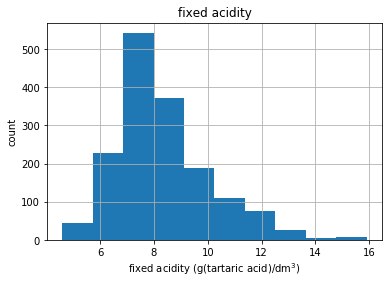

In [26]:
# plot first column of df
import matplotlib.pyplot as plt

pd.DataFrame.hist(df_rwine.iloc[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()

In [30]:
# importing nonflat files from the web, excel example
# get python dictionary with sheet names as keys and corresponding DataFrames as corresponding values

url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

xl = pd.read_excel(url, sheet_name=None)

print(xl.keys())   # prints sheetnames

odict_keys(['1700', '1900'])


In [31]:
# print head of first sheet
print(xl['1700'].head())

                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


HTTP requests to import files from the web

    URL = Uniform/Universal Resource Locator
    Two Ingredients of URL
        - protocol identifier such as http: or https
        - resource name such as datacamp.com
    
    HTTP = HyperText Transfer Protocol, foundation of data communication for the web
    HTTPS = more secure form of HTTP
    
    Each time go to a website, actually sending a HTTP request to a server and this request is known as GET request
        - urlretrieve() performs a GET request
        - use it get HTML data
        - HTML = HyperText Markup Language
        
    from urllib.request import urlopen, Request
    url = "https://www.wikipedia.org/"
    request = Request(url)              # package GET request using Request()
    response = urlopen(request)         # send request and catch response using urlopen()
    html = response.read()              # apply read() to response to return HTML as string and store in variable html
    response.close()                    # then close response
    

GET requests using request

    import requests
    url = "http://www.wikipedia.org/"
    r = requests.get(url)               # send the request and catch the response
    text = r.text                       # apply text method to response which returns HTML as string

In [32]:
from urllib.request import urlopen, Request

url = "http://www.datacamp.com/teach/documentation"

request = Request(url)                 # this packages the request
response = urlopen(request)            # sends the request and catches the response

print(type(response))                  # print datatype of response

response.close()                       # polite to close response!

<class 'http.client.HTTPResponse'>


## Scraping the Web in Python

Beautiful Soup

    - parse and extract structured data from HTML
    - make tag soup (structurally or syntactically incorrect html code) beautiful and extract information
    
    from bs4 import BeautifulSoup
    import requests
    url = 'https://www.crummy.com/software/BeautifulSoup/'
    r = requests.get(url)
    html_doc = r.text
    soup = BeautifulSoup(html_doc)     # create beautifulsoup object from resulting html then prettify it
    print(soup.prettify())             # prettified is indented in way would expect properly written html to be
    

Exploring Beautiful Soup
    
    print(soup.title)                  # extracts title
    print(soup.get_text())             # extracts text
    
    for link in soup.find_all('a'):    # extracts url's of all the hyperlinks in the html
        print(link.get('href'))

In [34]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.python.org/~guido/'
r = requests.get(url)                 # package request, send request and catch response r
html_doc = r.text                     # extracts the response as html

soup = BeautifulSoup(html_doc, "lxml")        # create BeautifulSoup object from HTML
pretty_soup = soup.prettify()         # prettify the BeautifulSoup object

print(pretty_soup)                    # print the response

<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
  </p>
  <h3>
   <a href="http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg">
    Who
I Am
   </a>
  </h3>
  <p>
   Read
my
   <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
    "King's
Day Speech"
   </a>
   for some inspiration.
  </p>
  <p>
   I am the author of the
   <a href="http://www.python.org">
    Python
   </a>
   programming language.  See also my
   <a href="Resume.html">
    resume
   </a>
   and my
   <a href="Publications.html">
    publications list
   </a>
   , a
   <a href="bio.html">
    brief bio
   </a>
   , assor

In [36]:
guido_title = soup.title              # get title of webpage
guido_text = soup.get_text()          # get text of webpage

print(guido_title)
print(guido_text)

<title>Guido's Personal Home Page</title>


Guido's Personal Home Page




Guido van Rossum - Personal Home Page
"Gawky and proud of it."
Who
I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.  I
also have
a G+
profile.

In January 2013 I joined
Dropbox.  I work on various Dropbox
products and have 50% for my Python work, no strings attached.
Previously, I have worked for Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but if you ask
me a question about using Python, it's likely that I won't have time
to answer it, and will instead ref

In [37]:
# find all 'a' tags (which define hyperlinks)
a_tags = soup.find_all('a')

for link in a_tags:
    print(link.get('href'))

pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
https://plus.google.com/u/0/115212051037621986145/posts
http://www.dropbox.com
Resume.html
http://groups.google.com/groups?q=comp.lang.python
http://stackoverflow.com
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif


# Introduction to APIs and JSONs

### APIs - Application Programming Interface
    - set of protocols and routines for building and interacting with software applications
    - we'll use OMDb API (The Open Movie Database) and Twitter API to pull data from both applications

### JSONs - JavaScript Object Notation
    - file format used as standard form for transfering data through APIs
    - real-time server-to-browser communication
    - when loading JSONs into python, natural to store them into dict
        - keys will always be strings
        - values can be strings, integers, arrays, or objects (object could even be JSON, then have nested JSONs) 

Loading JSONs in Python

    import json
    with open('snakes.json', 'r') as json_file:
        json_data = json.load(json_file)
    
    type(json_data)
        <output: dict>                          # python imports it as dictionary
    
    for key, value in json_data.items():        # will print key-value pairs to console
        print(key + ':', value)
    
    for k in json_data.keys():
        print(k + ':', json_data[k]             # another way to print key-value pairs
                                                # recall that to access value in dict use syntax dictionary[key]

### APIs and Interacting with the World Wide Web

API - bunch of code that allows two software programs to communicate with each other
    - example, if wanted to stream Twitter data, would use Twitter API

Connecting to an API in Python

    import requests
    url = 'http://www.omdbapi.com/?t=hackers'
    r = requests.get(url)
    json_data = r.json()                       
    
    # cool aspect of requests package is that response object r has associated method json which is json decoder for when dealing with json data
    
    for key, value in json_data.items():
        print(key + ':', value)
        
What was that URL?
    
    http - making an http request
    www.omdbapi.com - querying the OMDb API
    ?t=hackers
        - this string that begins with ? is a Query String
        - Query Strings are parts of URLs that don't fit into conventional heirarchical path structure
        - what follows ? in Query String is the query we are making to OMDb API
        - t=hackers returns data for a movie with title (t) 'Hackers'
        - we knew this was how to perform such a query from the documentation on the OMDb API's home page

In [38]:
# recently OMDb changed their API, now also have to specify an API key
# add another argument to API key, apikey=ff21610b
# looks like ?apikey=ff21610b&t=social+network

# import requests ... already imported from before

url = 'http://www.omdbapi.com/?apikey=ff21610b&t=social+network'
r = requests.get(url)

print(r.text)

{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin (screenplay), Ben Mezrich (book)","Actors":"Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons","Plot":"Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"USA","Awards":"Won 3 Oscars. Another 165 wins & 168 nominations.","Poster":"https://ia.media-imdb.com/images/M/MV5BMTM2ODk0NDAwMF5BMl5BanBnXkFtZTcwNTM1MDc2Mw@@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.7/10"},{"Source":"Rotten Tomatoes","Value":"96%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.7","imdbVotes":"540,512","imdbID":"tt1285016","Type":"movie","DVD":"11

In [39]:
# now decode JSON data into a dictionary
json_data = r.json()

# print each key-value pair
for k in json_data.keys():
    print(k + ':', json_data[k])

Title: The Social Network
Year: 2010
Rated: PG-13
Released: 01 Oct 2010
Runtime: 120 min
Genre: Biography, Drama
Director: David Fincher
Writer: Aaron Sorkin (screenplay), Ben Mezrich (book)
Actors: Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Plot: Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.
Language: English, French
Country: USA
Awards: Won 3 Oscars. Another 165 wins & 168 nominations.
Poster: https://ia.media-imdb.com/images/M/MV5BMTM2ODk0NDAwMF5BMl5BanBnXkFtZTcwNTM1MDc2Mw@@._V1_SX300.jpg
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore: 95
imdbRating: 7.7
imdbVotes: 540,512
imdbID: tt1285016
Type: movie
DVD: 11 Jan 2011
BoxOffice: $96,400,000
Production: Colum

In [40]:
# also practice with Wikipedia API

# import package, but again already imported

url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza'
r_wiki = requests.get(url)
json_wikidata = r_wiki.json()

# print Wikipedia page extract from Wiki's Pizza page
pizza_extract = json_wikidata['query']['pages']['24768']['extract']
print(pizza_extract)

<p><b>Pizza</b> is a traditional Italian dish consisting of a yeasted flatbread typically topped with tomato sauce and cheese and baked in an oven. It can also be topped with additional vegetables, meats, and condiments, and can be made without cheese.</p>
<p>The term <i>pizza</i> was first recorded in the 10th century, in a Latin manuscript from the Southern Italian town of Gaeta in Lazio, on the border with Campania. Modern pizza was invented in Naples, and the dish and its variants have since become popular and common in many areas of the world. In 2009, upon Italy's request, Neapolitan pizza was registered with the European Union as a Traditional Speciality Guaranteed dish. The <i>Associazione Verace Pizza Napoletana</i> (True Neapolitan Pizza Association), a non-profit organization founded in 1984 with headquarters in Naples, aims to "promote and protect... the true Neapolitan pizza".</p>
<p>Pizza is one of the most popular foods in the world and a common fast food item in Europe 

### Twitter API and Authentication
    - learn how to stream data from Twitter API
    - how to filter incoming tweets for keywords
    - about API Authentication and OAuth
    - how to use the Tweepy Python package

Access the Twitter API - must have an account!
    - login to Twitter Apps and create new app (https://apps.twitter.com/)
    - under Keys and Access Tokens, need:
        - API Key
        - API Secret
        - Access Token
        - Access Token Secret
    - going to use Streaming API
    - Tweets are returned a JSONs
    
    import tweepy, json
    
    access_token = "..."
    access_token_secret = "..."
    consumer_key = "..."
    consumer_secret = "..."
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    
    class MyStreamListener(tweepy.StreamListener):            # define a tweet listener
        def __init__(self, api=none)
            super(MyStreamListener, self).__init__()
            self.num_tweets = 0
            self.file = open("tweets.txt", "w")               # tweet listener creates file tweets.txt
            
        def on_status(self, status):
            tweet = status._json
            self.file.write(json.dumps(tweet) + '\n')         # collects streaming tweets, writes to file tweets.txt
            tweet_list.append(status)
            self.num_tweets += 1
            if self.num_tweets < 100:                         # once 100 tweets streamed, listener closes file/stops
                return True
            else:
                return False
            self.file.close()

    
    Using Tweepy # create streaming object and authenticate
    l = MyStreamListener()
    stream = tweepy.Stream(auth, l)
    
    stream.filter(track=['apples', 'oranges']) # this line filters Twitter Streams to capture data by keywords

In [65]:
# import package
import tweepy, json

access_token = "248944628-ugVn2o67KUmPp7c0DGTvXZ2IJFmOct0dXttV9bAB"
access_token_secret = "dZ1xfm7gu3r8SiHyubcC0lhpv5wWVnoAyCYclQUdXh3dN"
consumer_key = "DcbOYOJ7X9MYuXL4rjqczfEVp"
consumer_secret = "9tqNXQankRrvfLHDWfVC6tYvUtlIwm6Df7Rgh1lN5JhkIg1SCp"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [89]:
class MyStreamListener(tweepy.StreamListener):            # define a tweet listener
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")               # tweet listener creates file tweets.txt
            
    def on_status(self, status):
        tweet = status._json
        self.file.write(json.dumps(tweet) + '\n')         # collects streaming tweets, writes to file tweets.txt
        self.num_tweets += 1
        if self.num_tweets < 500:                         # once 500 tweets streamed, listener closes file/stops
            return True
        else:
            self.file.close()
            return False
    
    def on_error(self, status):
        print(status)

    
# initialize Stream Listener
l = MyStreamListener()
stream = tweepy.Stream(auth, l)
    
stream.filter(track=['curry', 'harden', 'warriors', 'rockets'])

In [90]:
# string of path to file: tweets_data_path
tweets_data_path = 'tweets.txt'

# initialize empty list to store tweets: tweets_data
tweets_data = []

# open connection to file
tweets_file = open(tweets_data_path, "r")

# read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# close connection to file
tweets_file.close()

# print keys of first tweet dict
print(tweets_data[0].keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'extended_entities', 'favorited', 'retweeted', 'possibly_sensitive', 'filter_level', 'lang', 'timestamp_ms'])


In [91]:
# build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

print(df.head())

                                                text lang
0  RT @timelesssports_: (2007) Steph Curry gettin...   en
1  When I don't get to watch the game Curry goes ...   en
2  @bonnermvp_ foda mesmo foi o  lebraão e o kyri...   pt
3          RT @DwyaneWade: 🗣 https://t.co/rF8cQaLwtG  und
4                               Rockets done for smh   en


In [92]:
import re

def word_in_text(word, tweet):
    word = word.lower()
    text = tweet.lower()
    match = re.search(word, tweet)
    
    if match:
        return True
    return False

# initialize list to store tweet counts
[curry, harden, warriors, rockets] = [0, 0, 0, 0]

# interate through df, counting number of tweets in which either Lindor or smile is mentioned
for index, row in df.iterrows():
    curry += word_in_text('curry', row['text'])
    harden += word_in_text('harden', row['text'])
    warriors += word_in_text('warriors', row['text'])
    rockets += word_in_text('rockets', row['text'])

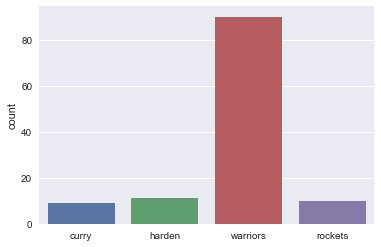

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn style
sns.set(color_codes=True)

# create list of labels: wcf18
wcf18 = ['curry', 'harden', 'warriors', 'rockets']

# plot histogram
ax = sns.barplot(wcf18, [curry, harden, warriors, rockets])
ax.set(ylabel="count")
plt.show()